# 1.7 Truncation and Alignment
* Where to truncate when using SVD
    * truncation은 임계값 $t$보다 큰 값이 유지되고 나머지 singular value는 truncate 되는 임계값으로 볼 수 있다.
    * alignment of data가 SVD approximation의 rank에 영향을 준다.

* Optimal Hard Threshold
    * 행렬이 Gaussian white noise로 오염된 low-rank structure를 갖는다 가정 하에 optimal hard threshold truncation의 임계값을 결정한다.
    * data matrix X를 low rank $X_{true}$와 noise matrix $X_{noise}$의 합으로 가정한다. $X = X_{true} + {\gamma}X_{noise}$
    * $X_{noise}$는 독립적이고 zero mean과 unit variance의 가우시안 랜덤 변수로 가정한다.
    * ${\gamma}$는 noise의 규모이다.
    1. 만약 $X \in R^{n \times n}$ 이 정방행렬이면 ${\tau} = (4/{\sqrt{3}}){\sqrt{n}}{\gamma}$
    2. 만약 $X \in R^{n \times m}$ 이 직사각행렬이면 상수 $4/{\sqrt{3}}$ 가 ${\beta} = m/n$ 으로 바뀐다. ${\tau} = {\lambda}({\beta}){\sqrt{n}}{\gamma}$
    
        ${\lambda}({\beta}) = (2({\beta}+1)+8{\beta}/(({\beta}+1)+({\beta}^2+14{\beta}+1)^{0.5}))^{0.5}$
        
        $n<<m$ 인 경우 ${\beta} = n/m$ 
    3. unknown noise ${\gamma}$와 unknown 직사각행렬 $X \in R^{n \times m}$ 의 경우 ${\tau} = {\omega}({\beta}){\sigma}_{med}$
        <!-- ${\omega}({\beta}) = {\lambda}({\beta})/{\mu}_{\beta}$ 의  -->


* hard threshold가 더 많은 noise 를 filter할 수 있음을 확인할 수 있다.

2


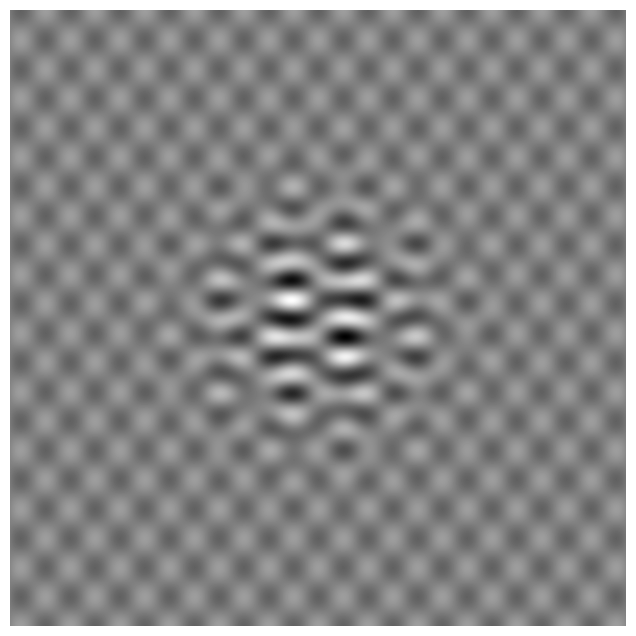

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

t = np.arange(-3,3,0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T
Xr = np.linalg.matrix_rank(X)
print(Xr)
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

이미지 원본

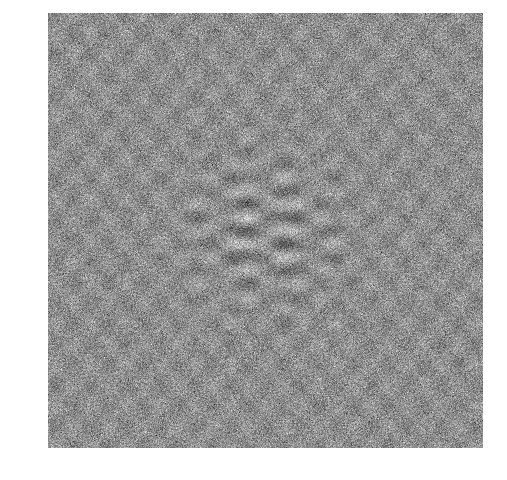

In [47]:
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)  #무작위 노이즈 추가
plt.imshow(Xnoisy)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

최초 이미지에 무작위 노이즈를 추가한 결과


2


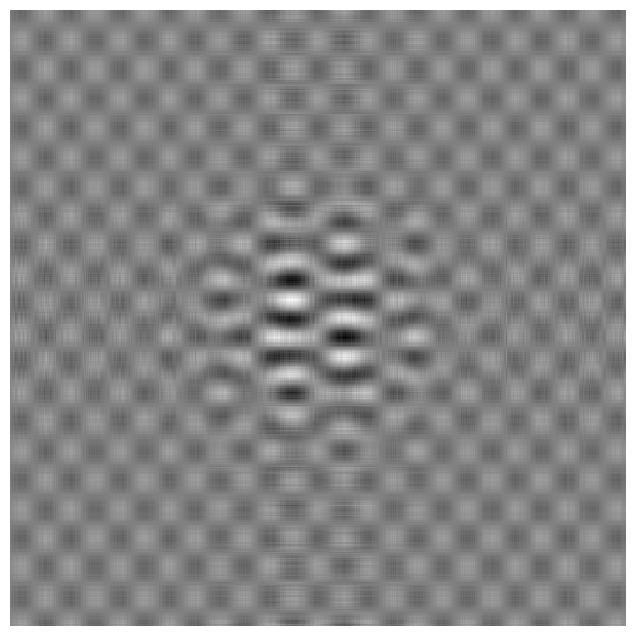

In [19]:
U, S, VT = np.linalg.svd(Xnoisy,full_matrices=0)
N = Xnoisy.shape[0]  #이미지 크기 확인
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma # Hard threshold   하드 임계값 계산
r = np.max(np.where(S > cutoff)) # Keep modes w/ sig > cutoff    이미지에서 주요 정보를 포함한 주요 모드의 수 나타냄

Xclean = U[:,:(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1),:]    #이미지 복원    특이값 중 상위 r+1개를 사용해 이미지 복원

Xcr = np.linalg.matrix_rank(Xclean)
print(Xcr)

plt.imshow(Xclean)
plt.set_cmap('gray')
plt.axis('off')
plt.show()

SVD를 사용해 U, S, VT를 구한 후 hard threshold값을 계산하고 r값을 계산한다. 특이값중 상위 r+1개를 사용해 이미지를 복원한다.

402


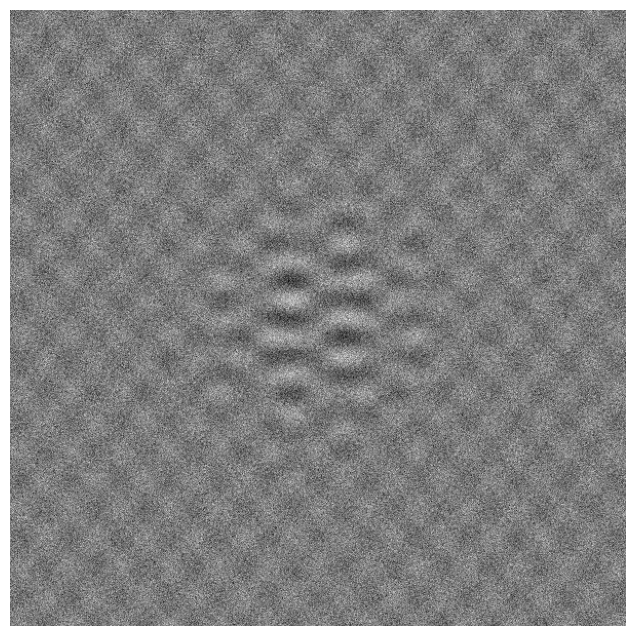

In [17]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy    누적 에너지 계산
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy    90%이상의 에너지를 가진 인덱스중 최소값을 선택

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]     # 이미지 복원
X90r = np.linalg.matrix_rank(X90)
print(X90r)
plt.imshow(X90)
plt.set_cmap('gray')
plt.axis('off')
plt.show()
# 

* 이미지의 특이값 S를 사용해 에너지를 누적 합산한다. 그 후 np.sum(S)로 나누어 정규화를 함.
* 에너지가 90%이상인 인덱스를 찾아 최소값을 구함
* r90을 사용해 이미지를 복원하고 나타냄.
* 90%의 풀랭크를 사용하는 것은 그리 좋지 않다.
* hard threshold가 노이즈를 더 많이 효율적으로 필터링 함을 확인할 수 있다.

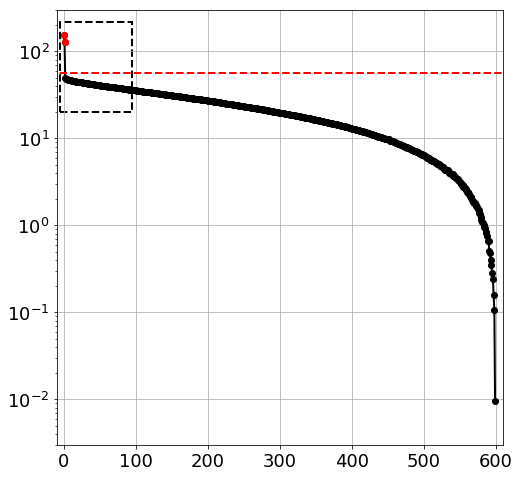

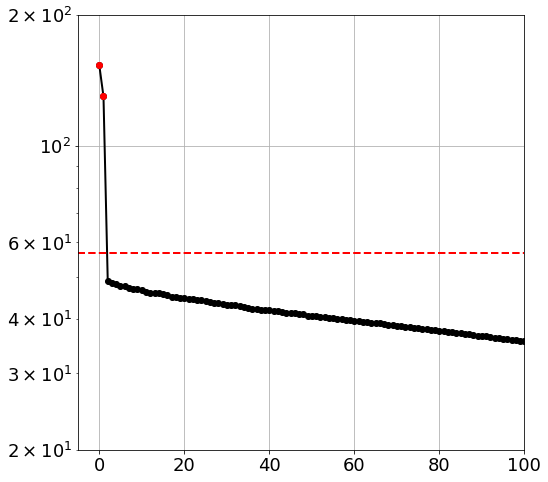

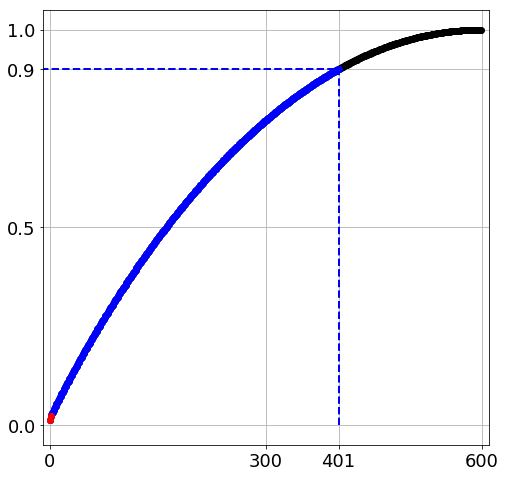

In [66]:
## Plot Singular Values
# 노이즈 임계값과 누적 에너지를 그래프로 확인해 어떤 특이값을 선택하고 이미지를 처리할지 결정하는 데 시각적으로 보여줌


fig1,ax1 = plt.subplots(1)

ax1.semilogy(S,'-o', color='k', linewidth=2)
ax1.semilogy(np.diag(S[:(r+1)]),'o', color='r', linewidth=2)
ax1.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
rect = patches.Rectangle((-5,20),100,200,linewidth=2,linestyle='--',facecolor='none',edgecolor='k')
ax1.add_patch(rect)
plt.xlim((-10,610))
plt.ylim((0.003,300))
ax1.grid()
plt.show()
# 붉은 점선은 노이즈 임계값을 (cut off) 나타내며 어떤 특이값이 중요한지 결정할 수 있다.


fig2,ax2 = plt.subplots(1)

ax2.semilogy(S,'-o', color='k', linewidth=2)
ax2.semilogy(np.diag(S[:(r+1)]),'o', color='r', linewidth=2)
ax2.plot(np.array([-20, N+20]),np.array([cutoff, cutoff]),'--', color='r', linewidth=2)
plt.xlim((-5,100))
plt.ylim((20,200))
ax2.grid()
plt.show()
# 노이즈의 임계값을 더 자세히 확인할 수 있음


fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',linewidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',linewidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',linewidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',linewidth=2)

ax3.grid()
plt.show()
# 특이값의 누적 에너지를 나타냄
# 90%의 에너지를 보존하는 랭크는 파란색 선으로 나타나짐
# 붉은 점은 현재 선택한 랭크까지의 누적 에너지를 나타냄
# rank가 401일 때 (90%) 노이즈가 살아나기에 다 복원할 필요가 없다.


* Importance of Data Alignment
    * 정렬되지 않은 데이터의 SVDd의 pitfall을 다룸
    * 데이터의 차원 축소 및 일관된 특징을 추출할 때 central weakness of SVD 를 보여줌
    * 내부 사각형을 회전시키면 이미지 축과 정렬되지 않기에 추가적인 non-zero singular values가 스펙트럼에 나타남을 확인할 수 있음.
    * SVD는 geometric 하기에 데이터가 나타내는 좌표 시스템에 의존한다. unitary transformation 의 경우에만 일반적으로 변하지 않는다. 
    * 열의 개체가 이동, 회전 및 크기 조정이 되면 SVD rank가 폭발적으로 증가하기에 사전 처리를 하지 않은 데이터에 사용이 매우 제한됨

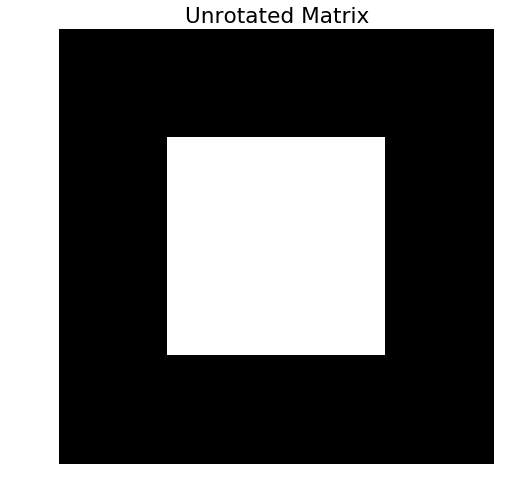

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Unrotated Matrix')
plt.show()


이미지 원본

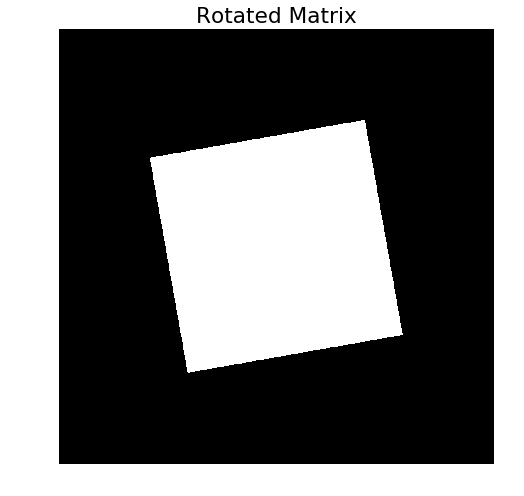

In [ ]:
X_rot = skimage.transform.rotate(X,10)
X_rot[np.nonzero(X_rot)] = 1


plt.imshow(Y)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Rotated Matrix')
plt.show()

이미지 원본을 10도 회전시킴

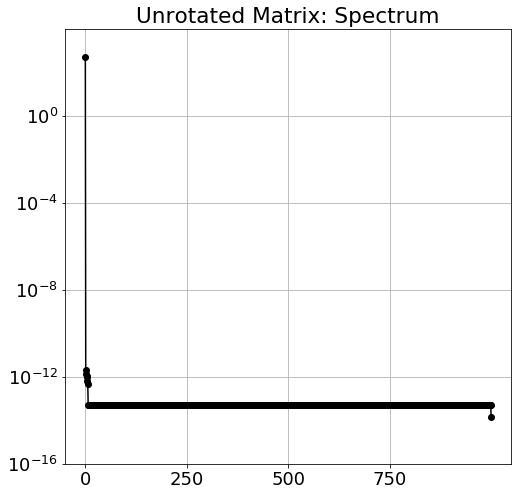

In [ ]:
U, S, VT = np.linalg.svd(X,full_matrices=0)


plt.semilogy(S,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Unrotated Matrix: Spectrum')
plt.show()

원본 이미지의 SVD 스펙트럼. x축, y축과 정력이 완벽하게 되어있으면 1개의 non-zero singular value를 가지고 이에 대응하는 폭과 높이를 가진 특이 벡터를 가짐

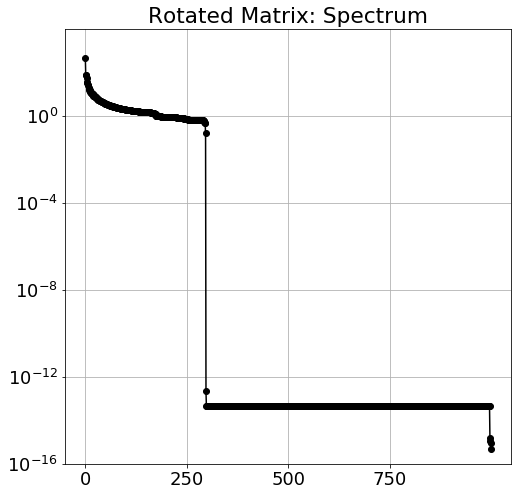

In [ ]:
U_rot, S_rot, VT_rot = np.linalg.svd(X_rot,full_matrices=0)

plt.semilogy(S_rot,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Rotated Matrix: Spectrum')
plt.show()

* 회전된 이미지의 SVD 스펙트럼. 스펙트럼이 훨씬 복잡해 짐을 볼 수 있고 추가적인 non-zero singular values가 생김. 
* 위 예제들을 통해 SVD는 기능적으로 geometric하다는 것을 확인할 수 있다.

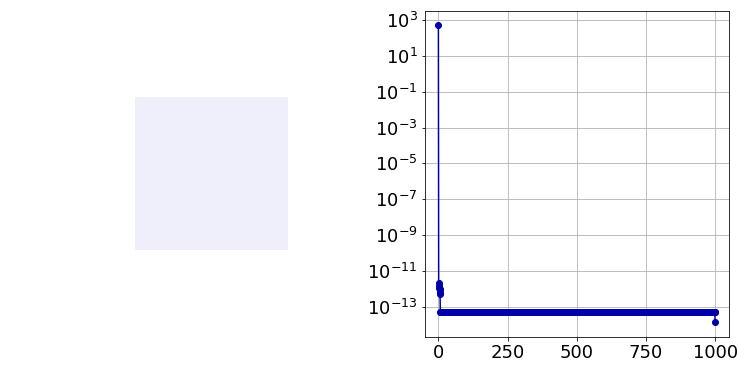

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import skimage.transform

plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams.update({'font.size': 18})

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

nAngles = 12 # Sweep through 12 different angles, from 0:4:44 degrees
cm_np = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])


cmap = plt.cm.jet
cmap.set_bad(alpha = 0.0)

U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X),vmin=0,vmax=nAngles)
plt.set_cmap(cmap)
plt.axis('off')


ax2 = fig1.add_subplot(122)
plt.semilogy(S,'-o',color=tuple(cm_np[0]))
plt.grid()

plt.show()

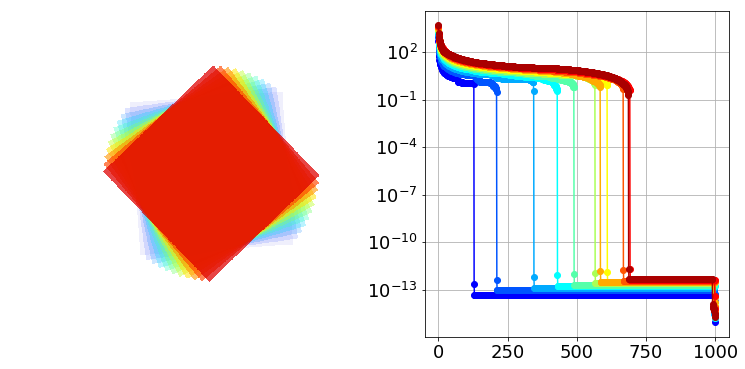

In [ ]:
Xrot = X

fig, axs = plt.subplots(1,2)

for j in range(nAngles):
    Xrot = skimage.transform.rotate(X,j*4) #rotate by theta = j*4 degrees
    Xrot[np.nonzero(Xrot)] = j
    
    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot),vmin=0,vmax=nAngles)
    plt.set_cmap(cmap)
    axs[0].axis('off')

    axs[1].semilogy(S,'-o',color=tuple(cm_np[j]))
    axs[1].axis('on')
    axs[1].grid(1)

plt.show()

회전각이 커질 수록 SVD 스펙트럼이 더 복잡해지고 non-zero singular values가 더 많아짐을 확인할 수 있다.